In [28]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [8]:
X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [9]:
reg.score(X_test, y_test)

0.8344172446249604

In [26]:
line.shape
line

array([[-3.        ],
       [-2.99399399],
       [-2.98798799],
       [-2.98198198],
       [-2.97597598],
       [-2.96996997],
       [-2.96396396],
       [-2.95795796],
       [-2.95195195],
       [-2.94594595],
       [-2.93993994],
       [-2.93393393],
       [-2.92792793],
       [-2.92192192],
       [-2.91591592],
       [-2.90990991],
       [-2.9039039 ],
       [-2.8978979 ],
       [-2.89189189],
       [-2.88588589],
       [-2.87987988],
       [-2.87387387],
       [-2.86786787],
       [-2.86186186],
       [-2.85585586],
       [-2.84984985],
       [-2.84384384],
       [-2.83783784],
       [-2.83183183],
       [-2.82582583],
       [-2.81981982],
       [-2.81381381],
       [-2.80780781],
       [-2.8018018 ],
       [-2.7957958 ],
       [-2.78978979],
       [-2.78378378],
       [-2.77777778],
       [-2.77177177],
       [-2.76576577],
       [-2.75975976],
       [-2.75375375],
       [-2.74774775],
       [-2.74174174],
       [-2.73573574],
       [-2

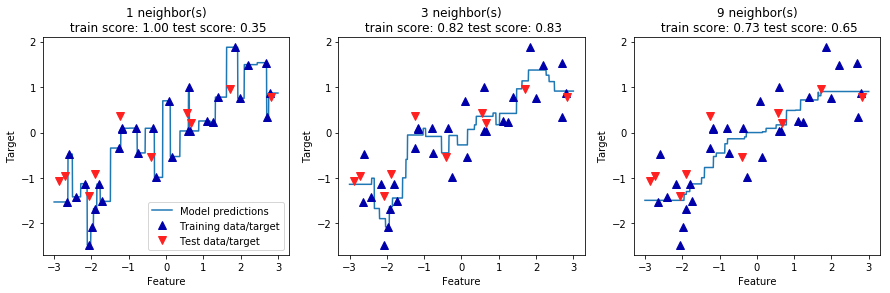

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
# 创建1000个数据点， 在-3和3之间均匀分布
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^',  c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v',  c=mglearn.cm2(1), markersize=8)
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    ax.set_title(
                "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
                n_neighbors, reg.score(X_train, y_train),
                reg.score(X_test, y_test))    
    )
    axes[0].legend(["Model predictions", "Training data/target",
"Test data/target"], loc="best")

从图中可以看出， 仅使用单一邻居， 训练集中的每个点都对预测结果有显著影响， 预
测结果的图像经过所有数据点。 这导致预测结果非常不稳定。 考虑更多的邻居之后，
预测结果变得更加平滑， 但对训练数据的拟合也不好。

一般来说， KNeighbors 分类器有 2 个重要参数： 邻居个数与数据点之间距离的度量方法。 在实践中， 使用较小的邻居个数（ 比如 3 个或 5 个） 往往可以得到比较好的结果， 但你应该调节这个参数。 选择合适的距离度量方法超出了本书的范围。 默认使用欧式距离， 它在许多情况下的效果都很好。


这一算法对于有很多特征（ 几百或更多） 的数据集往往效果不好， 对于大多数特征的大多数取值都为 0 的数据集（ 所谓的稀疏数据集 ） 来说， 这一算法的效果尤其不好。